# Angie's thoughts on the data:

This strain of mouse is clearly a good model for cancer, as mice with placebo treatment showed signs of cancer development over time.  They had tumors that increased in size, the cancer spread (as shown by increased metastasis), and several mice died over the course of the study. Nine drugs were tested to see if they could influence the growth of existing tumors, spread to other sites in the animal, and survivability. 

Two drugs, Capomulin and Ramicane, showed a decrease in tumor volume over the course of treament. So, not only did these drug prevent tumor growth, they decreased the tumor's tissues. It would be interetesting to test the tumor tissue for sign of increased apoptosis or immune responses. While statistic tests (such as t-test) weren't applied, the trend are well outside the standard error, suggesting these trends are statistically significant. A few of the drug (i.e. Ceftamin, Propriva, Infubinol, Zoniferol) had modest effects at reducing tumor volume.  The other drugs performed similar to placebo treatment. These results suggest that Capomulin and Ramicane can not only prevent growth, but actively shrink, existing tumors. 

Capomulin and Ramicane were also the most potent drugs for preventing metastasis, as mice treated with these drugs had the smallest increase in new metastatic sites. Neither drug prevented metatstasis completely (although we can't rule out from these tests that the tumors were already present, but too small for the initial detection assay on day 0). Ceftamin, Propriva, and Stelasyn showed significat decreases in metastasis, but not as robust as Capomulin and Ramicane. Future experiments might include combinatoral treatments to see if any of these drugs have synergystic effects on metastasis.

Critically, the two top treatments in the previous assays (Capomulin and Ramicane) also increased survival of the mice. Treatment with the drugs allowed more than 80% of the population to survive over the course of treatment, compared to roughly 50% survival with placebo treatment. Importantly, Propriva and Infubinol decreased survival compared to placebo. Use of Propriva and Infubinol should be discontinued, as it shows signs of toxicity at these levels and only a modest effect on cancer development, suggesting that lower levels of the drug, while perhaps not toxic, won't be beneficial as a cancer intervention.

Finally, these data are clearly fake, as no population of mice with predispositions to tumors would have exactly the same average volume of tumors at day 0, even if they were from the same litter (and thus the same age). So, if I were working for this company, I'd start having some questions about the integrity of the researchers involved in this project. 

In [166]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
mouse_df.head()

clinical_df = pd.read_csv(clinical_trial_data_to_load)
clinical_df.head()

# Combine the data into a single dataset
merge_df = pd.merge(mouse_df, clinical_df, on = "Mouse ID", how = "outer")

# Display the data table for preview
merge_df.head() #1906 rows
#merge_df.dtypes
#drug = merge_df["Drug"].unique()
#drug #['Stelasyn', 'Propriva', 'Naftisol', 'Ketapril', 'Capomulin',
       #'Infubinol', 'Ceftamin', 'Zoniferol', 'Ramicane', 'Placebo']

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [167]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_drg_time = merge_df.groupby(["Drug", "Timepoint"])

avg_tumor_vol = (grouped_drg_time["Tumor Volume (mm3)"].mean()).round(6)


# Convert to DataFrame
avg_tumor_vol_df = pd.DataFrame(avg_tumor_vol)


# Preview DataFrame
avg_tumor_vol_df.head() #100 rows

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [168]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_SE = (grouped_drg_time["Tumor Volume (mm3)"].sem()).round(6)


# Convert to DataFrame
tumor_SE_df = pd.DataFrame(tumor_SE)
tumor_SE_df = tumor_SE_df.rename(columns = {"Tumor Volume (mm3)" : "Standard Error"})

# Preview DataFrame
tumor_SE_df.head()

#Make lists of Standard Errors for error bar values
Capomulin_SE = tumor_SE_df.iloc[0:10, 0:3]
Capomulin_SE = Capomulin_SE["Standard Error"].tolist()
Ceftamin_SE = tumor_SE_df.iloc[10:20, 0:3]
Ceftamin_SE = Ceftamin_SE["Standard Error"].tolist()
Infubinol_SE = tumor_SE_df.iloc[20:30, 0:3]
Infubinol_SE = Infubinol_SE["Standard Error"].tolist()
Ketapril_SE = tumor_SE_df.iloc[30:40, 0:3]
Ketapril_SE = Ketapril_SE["Standard Error"].tolist()
Naftisol_SE = tumor_SE_df.iloc[40:50, 0:3]
Naftisol_SE = Naftisol_SE["Standard Error"].tolist()
Placebo_SE = tumor_SE_df.iloc[50:60, 0:3]
Placebo_SE = Placebo_SE["Standard Error"].tolist()
Propriva_SE = tumor_SE_df.iloc[60:70, 0:3]
Propriva_SE = Propriva_SE["Standard Error"].tolist()
Ramicane_SE = tumor_SE_df.iloc[70:80, 0:3]
Ramicane_SE = Ramicane_SE["Standard Error"].tolist()
Stelasyn_SE = tumor_SE_df.iloc[80:90, 0:3]
Stelasyn_SE = Stelasyn_SE["Standard Error"].tolist()
Zoniferol_SE = tumor_SE_df.iloc[90:100, 0:3]
Zoniferol_SE = Zoniferol_SE["Standard Error"].tolist()
Zoniferol_SE



[0.0,
 0.18895,
 0.263949,
 0.370544,
 0.533182,
 0.602513,
 0.800043,
 0.881426,
 0.998515,
 1.003576]

In [169]:
# Minor Data Munging to Re-Format the Data Frames
avg_tumor_vol_df_reindex = avg_tumor_vol_df.reset_index(drop = False)
avg_tumor_vol_df_reindex.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [170]:
# Minor Data Munging to Re-Format the Data Frames
avg_tumor_vol_df_reindex = avg_tumor_vol_df.reset_index(drop = False)
avg_tumor_vol_df_reindex
    
Capomulin = avg_tumor_vol_df_reindex.iloc[0:10, 0:3]
Capomulin = Capomulin.rename(columns = {"Tumor Volume (mm3)" : "Capomulin"})
Capomulin = Capomulin.drop("Drug", axis = 1)
Capomulin

Ceftamin = avg_tumor_vol_df_reindex.iloc[10:20, 0:3]
Ceftamin = Ceftamin.rename(columns = {"Tumor Volume (mm3)" : "Ceftamin"})
Ceftamin = Ceftamin.drop("Drug", axis = 1)
Ceftamin

Infubinol = avg_tumor_vol_df_reindex.iloc[20:30, 0:3]
Infubinol = Infubinol.rename(columns = {"Tumor Volume (mm3)" : "Infubinol"})
Infubinol = Infubinol.drop("Drug", axis = 1)
Infubinol

Ketapril = avg_tumor_vol_df_reindex.iloc[30:40, 0:3]
Ketapril = Ketapril.rename(columns = {"Tumor Volume (mm3)" : "Ketapril"})
Ketapril = Ketapril.drop("Drug", axis = 1)
Ketapril

Naftisol = avg_tumor_vol_df_reindex.iloc[40:50, 0:3]
Naftisol = Naftisol.rename(columns = {"Tumor Volume (mm3)" : "Naftisol"})
Naftisol = Naftisol.drop("Drug", axis = 1)
Naftisol

Placebo = avg_tumor_vol_df_reindex.iloc[50:60, 0:3]
Placebo = Placebo.rename(columns = {"Tumor Volume (mm3)" : "Placebo"})
Placebo = Placebo.drop("Drug", axis = 1)
Placebo

Propriva = avg_tumor_vol_df_reindex.iloc[60:70, 0:3]
Propriva = Propriva.rename(columns = {"Tumor Volume (mm3)" : "Propriva"})
Propriva = Propriva.drop("Drug", axis = 1)
Propriva

Ramicane = avg_tumor_vol_df_reindex.iloc[70:80, 0:3]
Ramicane = Ramicane.rename(columns = {"Tumor Volume (mm3)" : "Ramicane"})
Ramicane = Ramicane.drop("Drug", axis = 1)
Ramicane

Stelasyn = avg_tumor_vol_df_reindex.iloc[80:90, 0:3]
Stelasyn = Stelasyn.rename(columns = {"Tumor Volume (mm3)" : "Stelasyn"})
Stelasyn = Stelasyn.drop("Drug", axis = 1)
Stelasyn

Zoniferol = avg_tumor_vol_df_reindex.iloc[90:100, 0:3]
Zoniferol = Zoniferol.rename(columns = {"Tumor Volume (mm3)" : "Zoniferol"})
Zoniferol = Zoniferol.drop("Drug", axis = 1)
Zoniferol

# Preview that Reformatting worked
mean_tumor_df = pd.merge(Capomulin, Ceftamin, on = "Timepoint")
mean_tumor_df = pd.merge(mean_tumor_df, Infubinol, on = "Timepoint")
mean_tumor_df = pd.merge(mean_tumor_df, Ketapril, on = "Timepoint")
mean_tumor_df = pd.merge(mean_tumor_df, Naftisol, on = "Timepoint")
mean_tumor_df = pd.merge(mean_tumor_df, Placebo, on = "Timepoint")
mean_tumor_df = pd.merge(mean_tumor_df, Propriva, on = "Timepoint")
mean_tumor_df = pd.merge(mean_tumor_df, Ramicane, on = "Timepoint")
mean_tumor_df = pd.merge(mean_tumor_df, Stelasyn, on = "Timepoint")
mean_tumor_df = pd.merge(mean_tumor_df, Zoniferol, on = "Timepoint")
mean_tumor_df = mean_tumor_df.set_index("Timepoint")
mean_tumor_df

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


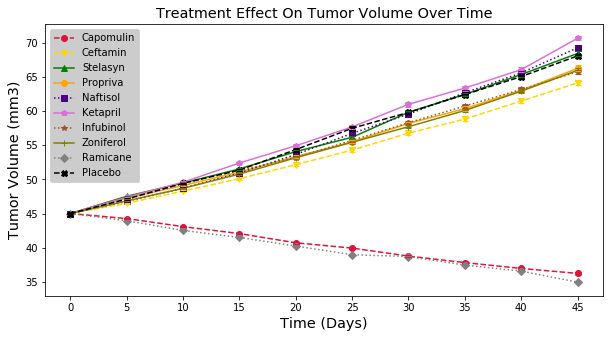

In [374]:
# Generate the Plot (with Error Bars)
#x axis labels
times = [0,5,10,15,20,25,30,35,40,45]
#drug names (for reference here)
drug_names = ['Capomulin','Ceftamin','Stelasyn', 'Propriva', 'Naftisol', 'Ketapril','Infubinol', 'Zoniferol', 'Ramicane', 'Placebo']
#Sets figure size
plt.figure(figsize= (10, 5))
#sets one tick for each time in list
tick_loc = [value for value in times]
plt.xticks(tick_loc)
#plot each drug with a unique marker, color, and line
plt.plot(times, mean_tumor_df["Capomulin"], 'k--', marker = "o", color = "crimson", label = "Capomulin")
plt.plot(times, mean_tumor_df["Ceftamin"], 'k--', marker = "v", color = "gold", label = "Ceftamin")
plt.plot(times, mean_tumor_df["Stelasyn"], marker = "^", color = "green", label = "Stelasyn")
plt.plot(times, mean_tumor_df["Propriva"], marker = "8", color = "orange", label = "Propriva")
plt.plot(times, mean_tumor_df["Naftisol"], 'k:', marker = "s", color = "indigo", label = "Naftisol")
plt.plot(times, mean_tumor_df["Ketapril"], marker = "p", color = "orchid", label = "Ketapril")
plt.plot(times, mean_tumor_df["Infubinol"], 'k:', marker = "*", color = "sienna", label = "Infubinol")
plt.plot(times, mean_tumor_df["Zoniferol"], marker = "+", color = "olive", label = "Zoniferol")
plt.plot(times, mean_tumor_df["Ramicane"], 'k:', marker = "D", color = "grey", label = "Ramicane")
plt.plot(times, mean_tumor_df["Placebo"], 'k--', marker = "X", color = "black",  label = "Placebo")
#Set legend location and font size
legend = plt.legend(loc='upper left', shadow=True, fontsize='x-large')
#Keeps legend smaller
legend = plt.legend(numpoints=1)
#Add backdrop color to legend
legend.get_frame().set_facecolor('silver')
#Add titles
plt.title("Treatment Effect On Tumor Volume Over Time", fontsize='x-large')
plt.xlabel("Time (Days)", fontsize='x-large')
plt.ylabel("Tumor Volume (mm3)", fontsize='x-large')

#Plot error bars; note that this command must be below the legend command or the labels will be duplicated in the legend
plt.errorbar(times, mean_tumor_df["Capomulin"], yerr= Capomulin_SE, capsize = 3, ecolor = "crimson", fmt='none')
plt.errorbar(times, mean_tumor_df["Ceftamin"], yerr= Ceftamin_SE, capsize = 3, ecolor = "gold", fmt='none')
plt.errorbar(times, mean_tumor_df["Stelasyn"], yerr= Stelasyn_SE, capsize = 3, ecolor = "green", fmt='none')
plt.errorbar(times, mean_tumor_df["Propriva"], yerr= Propriva_SE, capsize = 3, ecolor = "orange", fmt='none')
plt.errorbar(times, mean_tumor_df["Naftisol"], yerr= Naftisol_SE, capsize = 3, ecolor = "indigo", fmt='none')
plt.errorbar(times, mean_tumor_df["Ketapril"], yerr= Ketapril_SE, capsize = 3, ecolor = "orchid", fmt='none')
plt.errorbar(times, mean_tumor_df["Infubinol"], yerr= Infubinol_SE, capsize = 3, ecolor = "sienna", fmt='none')
plt.errorbar(times, mean_tumor_df["Zoniferol"], yerr= Zoniferol_SE, capsize = 3, ecolor = "olive", fmt='none')
plt.errorbar(times, mean_tumor_df["Ramicane"], yerr= Ramicane_SE, capsize = 3, ecolor = "grey", fmt='none')
plt.errorbar(times, mean_tumor_df["Placebo"], yerr= Placebo_SE, capsize = 3, ecolor = "black", fmt='none')

# Save the Figure
plt.savefig("Images/tumorvolume.png")

#Show the figure
plt.show()



## Metastatic Response to Treatment

In [172]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_mets = (grouped_drg_time["Metastatic Sites"].mean()).round(6)
mean_mets

# Convert to DataFrame
mets_df = pd.DataFrame(mean_mets)
mets_df = mets_df.rename(columns = {"Metastatic Sites" : "Metastasis Mean"})

# Preview DataFrame
mets_df.head()


Metastasis Mean
Drug      Timepoint                 
Capomulin 0                 0.000000
          5                 0.160000
          10                0.320000
          15                0.375000
          20                0.652174

In [173]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
mets_SE = (grouped_drg_time["Metastatic Sites"].sem()).round(6)


# Convert to DataFrame
mets_SE_df = pd.DataFrame(mets_SE)
mets_SE_df = mets_SE_df.rename(columns = {"Metastatic Sites" : "Metastasis Standard Error"})

# Preview DataFrame
mets_SE_df.head()





Metastasis Standard Error
Drug      Timepoint                           
Capomulin 0                           0.000000
          5                           0.074833
          10                          0.125433
          15                          0.132048
          20                          0.161621

In [174]:
#Make lists of Standard Errors for error bar values
Capomulin_SE = mets_SE_df.iloc[0:10, 0:3]
Capomulin_SE = Capomulin_SE["Metastasis Standard Error"].tolist()
Ceftamin_SE = mets_SE_df.iloc[10:20, 0:3]
Ceftamin_SE = Ceftamin_SE["Metastasis Standard Error"].tolist()
Infubinol_SE = mets_SE_df.iloc[20:30, 0:3]
Infubinol_SE = Infubinol_SE["Metastasis Standard Error"].tolist()
Ketapril_SE = mets_SE_df.iloc[30:40, 0:3]
Ketapril_SE = Ketapril_SE["Metastasis Standard Error"].tolist()
Naftisol_SE = mets_SE_df.iloc[40:50, 0:3]
Naftisol_SE = Naftisol_SE["Metastasis Standard Error"].tolist()
Placebo_SE = mets_SE_df.iloc[50:60, 0:3]
Placebo_SE = Placebo_SE["Metastasis Standard Error"].tolist()
Propriva_SE = mets_SE_df.iloc[60:70, 0:3]
Propriva_SE = Propriva_SE["Metastasis Standard Error"].tolist()
Ramicane_SE = mets_SE_df.iloc[70:80, 0:3]
Ramicane_SE = Ramicane_SE["Metastasis Standard Error"].tolist()
Stelasyn_SE = mets_SE_df.iloc[80:90, 0:3]
Stelasyn_SE = Stelasyn_SE["Metastasis Standard Error"].tolist()
Zoniferol_SE = mets_SE_df.iloc[90:100, 0:3]
Zoniferol_SE = Zoniferol_SE["Metastasis Standard Error"].tolist()

In [175]:
# Minor Data Munging to Re-Format the Data Frames
mets_df_reindex = mets_df.reset_index(drop = False)
mets_df_reindex

mets_df_reindex = mets_df.reset_index(drop = False)
mets_df_reindex.head()

Capomulin = mets_df_reindex.iloc[0:10, 0:3]
Capomulin = Capomulin.rename(columns = {"Metastasis Mean" : "Capomulin"})
Capomulin = Capomulin.drop("Drug", axis = 1)
Capomulin

Ceftamin = mets_df_reindex.iloc[10:20, 0:3]
Ceftamin = Ceftamin.rename(columns = {"Metastasis Mean" : "Ceftamin"})
Ceftamin = Ceftamin.drop("Drug", axis = 1)
Ceftamin

Infubinol = mets_df_reindex.iloc[20:30, 0:3]
Infubinol = Infubinol.rename(columns = {"Metastasis Mean" : "Infubinol"})
Infubinol = Infubinol.drop("Drug", axis = 1)
Infubinol

Ketapril = mets_df_reindex.iloc[30:40, 0:3]
Ketapril = Ketapril.rename(columns = {"Metastasis Mean" : "Ketapril"})
Ketapril = Ketapril.drop("Drug", axis = 1)
Ketapril

Naftisol = mets_df_reindex.iloc[40:50, 0:3]
Naftisol = Naftisol.rename(columns = {"Metastasis Mean" : "Naftisol"})
Naftisol = Naftisol.drop("Drug", axis = 1)
Naftisol

Placebo = mets_df_reindex.iloc[50:60, 0:3]
Placebo = Placebo.rename(columns = {"Metastasis Mean" : "Placebo"})
Placebo = Placebo.drop("Drug", axis = 1)
Placebo

Propriva = mets_df_reindex.iloc[60:70, 0:3]
Propriva = Propriva.rename(columns = {"Metastasis Mean" : "Propriva"})
Propriva = Propriva.drop("Drug", axis = 1)
Propriva

Ramicane = mets_df_reindex.iloc[70:80, 0:3]
Ramicane = Ramicane.rename(columns = {"Metastasis Mean" : "Ramicane"})
Ramicane = Ramicane.drop("Drug", axis = 1)
Ramicane

Stelasyn = mets_df_reindex.iloc[80:90, 0:3]
Stelasyn = Stelasyn.rename(columns = {"Metastasis Mean" : "Stelasyn"})
Stelasyn = Stelasyn.drop("Drug", axis = 1)
Stelasyn

Zoniferol = mets_df_reindex.iloc[90:100, 0:3]
Zoniferol = Zoniferol.rename(columns = {"Metastasis Mean" : "Zoniferol"})
Zoniferol = Zoniferol.drop("Drug", axis = 1)
Zoniferol

# Preview that Reformatting worked
mean_mets_df = pd.merge(Capomulin, Ceftamin, on = "Timepoint")
mean_mets_df = pd.merge(mean_mets_df, Infubinol, on = "Timepoint")
mean_mets_df = pd.merge(mean_mets_df, Ketapril, on = "Timepoint")
mean_mets_df = pd.merge(mean_mets_df, Naftisol, on = "Timepoint")
mean_mets_df = pd.merge(mean_mets_df, Placebo, on = "Timepoint")
mean_mets_df = pd.merge(mean_mets_df, Propriva, on = "Timepoint")
mean_mets_df = pd.merge(mean_mets_df, Ramicane, on = "Timepoint")
mean_mets_df = pd.merge(mean_mets_df, Stelasyn, on = "Timepoint")
mean_mets_df = pd.merge(mean_mets_df, Zoniferol, on = "Timepoint")
mean_mets_df = mean_mets_df.set_index("Timepoint")
mean_mets_df


,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


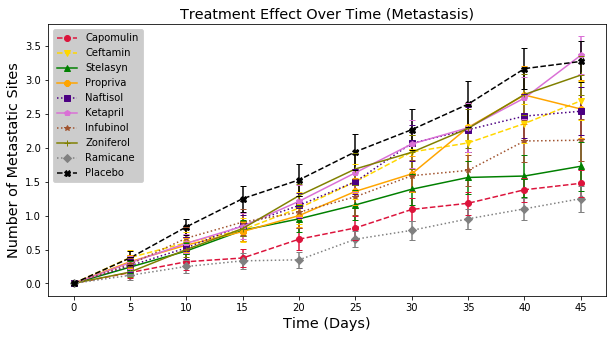

In [373]:
# Generate the Plot (with Error Bars)
#x axis labels
times = [0,5,10,15,20,25,30,35,40,45]
#drug names (for reference here)
drug_names = ['Capomulin','Ceftamin','Stelasyn', 'Propriva', 'Naftisol', 'Ketapril','Infubinol', 'Zoniferol', 'Ramicane', 'Placebo']
#Sets figure size
plt.figure(figsize= (10, 5))
#sets one tick for each time in list
tick_loc = [value for value in times]
plt.xticks(tick_loc)
#plot each drug with a unique marker, color, and line
plt.plot(times, mean_mets_df["Capomulin"], 'k--', marker = "o", color = "crimson", label = "Capomulin")
plt.plot(times, mean_mets_df["Ceftamin"], 'k--', marker = "v", color = "gold", label = "Ceftamin")
plt.plot(times, mean_mets_df["Stelasyn"], marker = "^", color = "green", label = "Stelasyn")
plt.plot(times, mean_mets_df["Propriva"], marker = "8", color = "orange", label = "Propriva")
plt.plot(times, mean_mets_df["Naftisol"], 'k:', marker = "s", color = "indigo", label = "Naftisol")
plt.plot(times, mean_mets_df["Ketapril"], marker = "p", color = "orchid", label = "Ketapril")
plt.plot(times, mean_mets_df["Infubinol"], 'k:', marker = "*", color = "sienna", label = "Infubinol")
plt.plot(times, mean_mets_df["Zoniferol"], marker = "+", color = "olive", label = "Zoniferol")
plt.plot(times, mean_mets_df["Ramicane"], 'k:', marker = "D", color = "grey", label = "Ramicane")
plt.plot(times, mean_mets_df["Placebo"], 'k--', marker = "X", color = "black",  label = "Placebo")
#Set legend location and font size
legend2 = plt.legend(loc='upper left', shadow=True, fontsize='x-large')
#Keeps legend smaller
legend2 = plt.legend(numpoints=1)
#Add backdrop color to legend
legend2.get_frame().set_facecolor('silver')
#Add titles
plt.title("Treatment Effect Over Time (Metastasis)", fontsize='x-large')
plt.xlabel("Time (Days)", fontsize='x-large')
plt.ylabel("Number of Metastatic Sites", fontsize='x-large')

#Plot error bars; note that this command must be below the legend command or the labels will be duplicated in the legend
plt.errorbar(times, mean_mets_df["Capomulin"], yerr= Capomulin_SE, capsize = 3, ecolor = "crimson", fmt='none')
plt.errorbar(times, mean_mets_df["Ceftamin"], yerr= Ceftamin_SE, capsize = 3, ecolor = "gold", fmt='none')
plt.errorbar(times, mean_mets_df["Stelasyn"], yerr= Stelasyn_SE, capsize = 3, ecolor = "green", fmt='none')
plt.errorbar(times, mean_mets_df["Propriva"], yerr= Propriva_SE, capsize = 3, ecolor = "orange", fmt='none')
plt.errorbar(times, mean_mets_df["Naftisol"], yerr= Naftisol_SE, capsize = 3, ecolor = "indigo", fmt='none')
plt.errorbar(times, mean_mets_df["Ketapril"], yerr= Ketapril_SE, capsize = 3, ecolor = "orchid", fmt='none')
plt.errorbar(times, mean_mets_df["Infubinol"], yerr= Infubinol_SE, capsize = 3, ecolor = "sienna", fmt='none')
plt.errorbar(times, mean_mets_df["Zoniferol"], yerr= Zoniferol_SE, capsize = 3, ecolor = "olive", fmt='none')
plt.errorbar(times, mean_mets_df["Ramicane"], yerr= Ramicane_SE, capsize = 3, ecolor = "grey", fmt='none')
plt.errorbar(times, mean_mets_df["Placebo"], yerr= Placebo_SE, capsize = 3, ecolor = "black", fmt='none')

# Save the Figure
plt.savefig("Images/mets_num.png")

#Show the figure
plt.show()



## Survival Rates

In [177]:
merge_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [178]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = grouped_drg_time["Mouse ID"].count()

# Convert to DataFrame
mouse_count_df = pd.DataFrame(mouse_count)

# Preview DataFrame; change in Mouse ID count indicates mouse death over time
mouse_count_df.head() #100 rows


Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [179]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_reindex = mouse_count.reset_index(drop = False)
mouse_count_reindex

mouse_count_reindex = mouse_count.reset_index(drop = False)
mouse_count_reindex.head()

Capomulin = mouse_count_reindex.iloc[0:10, 0:3]
Capomulin = Capomulin.rename(columns = {"Mouse ID" : "Survivors in Capomulin"})
Capomulin = Capomulin.drop("Drug", axis = 1)
Capomulin

Ceftamin = mouse_count_reindex.iloc[10:20, 0:3]
Ceftamin = Ceftamin.rename(columns = {"Mouse ID" : "Survivors in Ceftamin"})
Ceftamin = Ceftamin.drop("Drug", axis = 1)
Ceftamin

Infubinol = mouse_count_reindex.iloc[20:30, 0:3]
Infubinol = Infubinol.rename(columns = {"Mouse ID" : "Survivors in Infubinol"})
Infubinol = Infubinol.drop("Drug", axis = 1)
Infubinol

Ketapril = mouse_count_reindex.iloc[30:40, 0:3]
Ketapril = Ketapril.rename(columns = {"Mouse ID" : "Survivors in Ketapril"})
Ketapril = Ketapril.drop("Drug", axis = 1)
Ketapril

Naftisol = mouse_count_reindex.iloc[40:50, 0:3]
Naftisol = Naftisol.rename(columns = {"Mouse ID" : "Survivors in Naftisol"})
Naftisol = Naftisol.drop("Drug", axis = 1)
Naftisol

Placebo = mouse_count_reindex.iloc[50:60, 0:3]
Placebo = Placebo.rename(columns = {"Mouse ID" : "Survivors in Placebo"})
Placebo = Placebo.drop("Drug", axis = 1)
Placebo

Propriva = mouse_count_reindex.iloc[60:70, 0:3]
Propriva = Propriva.rename(columns = {"Mouse ID" : "Survivors in Propriva"})
Propriva = Propriva.drop("Drug", axis = 1)
Propriva

Ramicane = mouse_count_reindex.iloc[70:80, 0:3]
Ramicane = Ramicane.rename(columns = {"Mouse ID" : "Survivors in Ramicane"})
Ramicane = Ramicane.drop("Drug", axis = 1)
Ramicane

Stelasyn = mouse_count_reindex.iloc[80:90, 0:3]
Stelasyn = Stelasyn.rename(columns = {"Mouse ID" : "Survivors in Stelasyn"})
Stelasyn = Stelasyn.drop("Drug", axis = 1)
Stelasyn

Zoniferol = mouse_count_reindex.iloc[90:100, 0:3]
Zoniferol = Zoniferol.rename(columns = {"Mouse ID" : "Survivors in Zoniferol"})
Zoniferol = Zoniferol.drop("Drug", axis = 1)
Zoniferol

# Preview that Reformatting worked
mean_survival_df = pd.merge(Capomulin, Ceftamin, on = "Timepoint")
mean_survival_df = pd.merge(mean_survival_df, Infubinol, on = "Timepoint")
mean_survival_df = pd.merge(mean_survival_df, Ketapril, on = "Timepoint")
mean_survival_df = pd.merge(mean_survival_df, Naftisol, on = "Timepoint")
mean_survival_df = pd.merge(mean_survival_df, Placebo, on = "Timepoint")
mean_survival_df = pd.merge(mean_survival_df, Propriva, on = "Timepoint")
mean_survival_df = pd.merge(mean_survival_df, Ramicane, on = "Timepoint")
mean_survival_df = pd.merge(mean_survival_df, Stelasyn, on = "Timepoint")
mean_survival_df = pd.merge(mean_survival_df, Zoniferol, on = "Timepoint")
mean_survival_df = mean_survival_df.set_index("Timepoint")
mean_survival_df



,Survivors in Capomulin,Survivors in Ceftamin,Survivors in Infubinol,Survivors in Ketapril,Survivors in Naftisol,Survivors in Placebo,Survivors in Propriva,Survivors in Ramicane,Survivors in Stelasyn,Survivors in Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [180]:
tot_mice_df = mean_survival_df.take([0])
tot_mice_df

tot_mice= tot_mice_df.values.tolist() 
tot_mice

# ??How to set this up for 
#tot_mice = []

# for j in range(9):
#     mice = int(mean_survival_df.iloc[0, j])
#     tot_mice = tot_mice.append(mice)
#     #tot_mice = tot_mice.append(mean_survival_df.iloc[0, j])
  
# tot_mice

[[25, 25, 25, 25, 25, 25, 26, 25, 26, 25]]

In [395]:
#Convert mouse # to percent survival
drug_names = ['Capomulin','Ceftamin','Stelasyn', 'Propriva', 'Naftisol', 'Ketapril','Infubinol', 'Zoniferol', 'Ramicane', 'Placebo']
 

#for loop to calculate % survival across dataframe; adds new columns
for i in drug_names:
    mean_survival_df["% Survivors in " + i] = mean_survival_df["Survivors in " + i] / 25 * 100
#Problem with strategy above is that it assumes that all treatments started with 25 mice and they don't. 
#I tried setting up for loops to do the math, but didn't get it finished:
# for i in range(10):
#     mean_survival_calc = mean_survival_df.iloc[9, i] / mean_survival_df.iloc[0, i] * 100
#     mean_survival_perc = np.append(mean_survival_perc, mean_survival_calc)

# # Display the data to confirm  #note that this prints as a one dimensional numpy array
# mean_survival_perc
    
# #Convert to pd dataframe
# mean_survival_perc_df = pd.DataFrame(mean_survival_perc.round(2), drug_names)
# mean_survival_perc_df = mean_survival_perc_df.rename(columns = {0: "Percent Survival"})
# mean_survival_perc_df = mean_survival_perc_df.reset_index(drop=False)
# mean_survival_perc_df = mean_survival_perc_df.rename(columns = {"index": "Treatment"})

# mean_survival_perc_df

mean_survival_df
#delete mouse count columns, keeping percentage columns as a new df
mean_survival_df2 = mean_survival_df.iloc[:, 10:]
mean_survival_df2

,% Survivors in Capomulin,% Survivors in Ceftamin,% Survivors in Stelasyn,% Survivors in Propriva,% Survivors in Naftisol,% Survivors in Ketapril,% Survivors in Infubinol,% Survivors in Zoniferol,% Survivors in Ramicane,% Survivors in Placebo
Timepoint,,,,,,,,,,
0,100.0,100.0,104.0,104.0,100.0,100.0,100.0,100.0,100.0,100.0
5,100.0,84.0,100.0,100.0,92.0,92.0,100.0,96.0,100.0,96.0
10,100.0,80.0,92.0,92.0,84.0,88.0,84.0,88.0,96.0,96.0
15,96.0,76.0,92.0,68.0,84.0,76.0,84.0,84.0,96.0,80.0
20,92.0,72.0,84.0,68.0,80.0,76.0,80.0,68.0,92.0,76.0
25,88.0,72.0,76.0,56.0,72.0,76.0,72.0,64.0,92.0,68.0
30,88.0,64.0,72.0,52.0,60.0,72.0,68.0,60.0,92.0,60.0
35,88.0,56.0,64.0,40.0,60.0,68.0,48.0,56.0,84.0,56.0
40,84.0,56.0,48.0,36.0,60.0,60.0,40.0,56.0,80.0,48.0


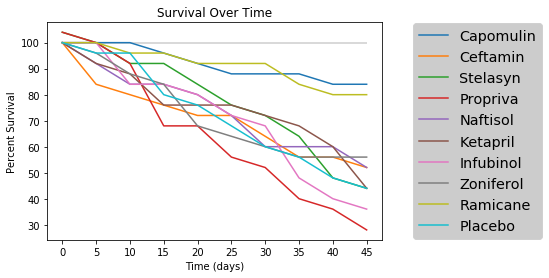

In [397]:
labels = ['Capomulin','Ceftamin','Stelasyn', 'Propriva', 'Naftisol', 'Ketapril','Infubinol', 'Zoniferol', 'Ramicane', 'Placebo']
times = [0,5,10,15,20,25,30,35,40,45]


# Generate the Plot (Accounting for percentages)
plt.plot(times, mean_survival_df2)
plt.title("Survival Over Time")
plt.xlabel("Time (days)")
plt.ylabel("Percent Survival")
plt.hlines(100, 0, 45, alpha = 0.2)

#sets one tick for each time in list
tick_loc = [value for value in times]
plt.xticks(tick_loc)
#Alternative code: plot each drug with a unique marker, color, and line
# plt.plot(times, mean_survival_perc_df["Capomulin"], 'k--', marker = "o", color = "crimson", label = "Capomulin")
# plt.plot(times, mean_survival_perc_df["Ceftamin"], 'k--', marker = "v", color = "gold", label = "Ceftamin")
# plt.plot(times, mean_survival_perc_df["Stelasyn"], marker = "^", color = "green", label = "Stelasyn")
# plt.plot(times, mean_survival_perc_df["Propriva"], marker = "8", color = "orange", label = "Propriva")
# plt.plot(times, mean_survival_perc_df["Naftisol"], 'k:', marker = "s", color = "indigo", label = "Naftisol")
# plt.plot(times, mean_survival_perc_df["Ketapril"], marker = "p", color = "orchid", label = "Ketapril")
# plt.plot(times, mean_survival_perc_df["Infubinol"], 'k:', marker = "*", color = "sienna", label = "Infubinol")
# plt.plot(times, mean_survival_perc_df["Zoniferol"], marker = "+", color = "olive", label = "Zoniferol")
# plt.plot(times, mean_survival_perc_df["Ramicane"], 'k:', marker = "D", color = "grey", label = "Ramicane")
# plt.plot(times, mean_survival_perc_df["Placebo"], 'k--', marker = "X", color = "black",  label = "Placebo")

#Set legend location and font size
#legend_x and _y and bbox_to_anchor positions legend outside of graph
legend_x = 1.5
legend_y = 0.5
legend2 = plt.legend(labels, loc='center right', shadow=False, fontsize='x-large', bbox_to_anchor=(legend_x, legend_y))

#Add backdrop color to legend
legend2.get_frame().set_facecolor('silver')

# Save the Figure, but it isn't saving the legend??
plt.savefig("Images/survival.png")

# Show the Figure
plt.show()



## Summary Bar Graph

In [185]:
mean_tumor_df

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [204]:
#test code
x1 = mean_tumor_df.iloc[9,0]
y1 = mean_tumor_df.iloc[0,0]
#p_s = (x - y) / y *100
p_s = (mean_tumor_df.iloc[9,0] - mean_tumor_df.iloc[0,0]) / mean_tumor_df.iloc[0,0] *100
p_s


-19.475302222222222

In [283]:
# Calculate the percent changes for each drug
drug_names = ['Capomulin','Ceftamin','Stelasyn', 'Propriva', 'Naftisol', 'Ketapril','Infubinol', 'Zoniferol', 'Ramicane', 'Placebo']
perc_tumor_change = []
#for loop to calculate % change in tumor across data frame
for i in range(10):
    #(day 45 vol - day 0 vol)/ day 0 vol * 100 ; using iloc and loop to select proper cells across dataframe
    perc_tumor_calc = (mean_tumor_df.iloc[9,i] - mean_tumor_df.iloc[0,i]) / mean_tumor_df.iloc[0,i] *100
    #numpy append function to save each calculation
    perc_tumor_change = np.append(perc_tumor_change, perc_tumor_calc)

# Display the data to confirm
perc_tumor_change #note that this prints as a one dimensional numpy array
    
#Convert to pd dataframe
perc_tumor_change_df = pd.DataFrame(perc_tumor_change, drug_names,)
perc_tumor_change_df = perc_tumor_change_df.rename(columns = {0: "Percent Tumor Volume Change"})
perc_tumor_change_df = perc_tumor_change_df.reset_index(drop=False)
perc_tumor_change_df = perc_tumor_change_df.rename(columns = {"index": "Treatment"})


perc_tumor_change_df



,Treatment,Percent Tumor Volume Change
0,Capomulin,-19.475302
1,Ceftamin,42.516491
2,Stelasyn,46.123471
3,Propriva,57.028796
4,Naftisol,53.923347
5,Ketapril,51.297960
6,Infubinol,47.241176
7,Zoniferol,-22.320900
8,Ramicane,52.085133
9,Placebo,46.579751


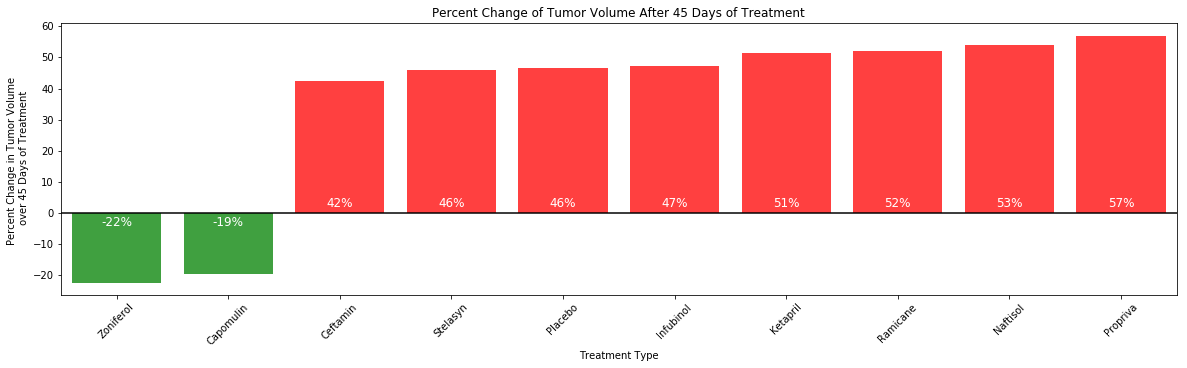

In [365]:
# Store all Relevant Percent Changes into a Tuple
perc_tumor_tuple = tuple((perc_tumor_change))
#Can sort the tuple, but now the data is not tied to drug condition. If I make a dataframe with the drug name (see above)
#then I can't make it a tuple. I'm not sure what good a tuple does here, so I'm going to approach this another way
perc_tumor_tuple = sorted(perc_tumor_tuple)
perc_tumor_tuple

# Splice the data between passing and failing drugs
perc_tumor_change_sort = perc_tumor_change_df.sort_values("Percent Tumor Volume Change")
perc_tumor_change_sort

# Orient widths. Add labels, tick marks, etc. 
x_axis = np.arange(len(perc_tumor_change_sort))
tick_loc = [value for value in x_axis]
plt.figure(figsize = (20, 5))

vol_bar_chart = plt.bar(x_axis, perc_tumor_change_sort["Percent Tumor Volume Change"], color = ["g","g","r", "r","r","r","r","r","r","r"], alpha = 0.75, align = "center", tick_label = perc_tumor_change_sort["Treatment"])
plt.xticks(rotation = 45)
plt.hlines(0, -1, 10)
plt.xlim(-0.5, len(x_axis)-0.5)

plt.title("Percent Change of Tumor Volume After 45 Days of Treatment")
plt.xlabel("Treatment Type")
#Note that \n is a command for "newline" in the title
plt.ylabel("Percent Change in Tumor Volume \n over 45 Days of Treatment")

# Use functions to label the percentages of changes
# for x, y in perc_tumor_tuple:
#     plt.text(x, y, s= perc_tumor_tuple, color='blue', fontweight='bold')
#plt.text(x_axis, y, s = perc_tumor_tuple, color='blue', fontweight='bold')
# Call functions to implement the function calls

def barlabel(chart_name):
    for bar in chart_name:
        height = bar.get_height()
        if height < 0:
            plt.text(bar.get_x() + bar.get_width()/2., (height - (height + 5 )), str(int(height)) + '%', ha = 'center', va = 'bottom', color = 'white', fontsize = 12)
        else:
            plt.text(bar.get_x() + bar.get_width()/2., (height - (height - 1 )), str(int(height)) + '%', ha = 'center', va = 'bottom', color = 'white', fontsize = 12)
barlabel(vol_bar_chart)

# Save the Figure; note you must do this above the code for showing the figure, or it will save a blank file!?!
plt.savefig("Images/tumorvolchange.png")

# Show the Figure
plt.show()

